In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from data_loading import *
from isoform_pairwise_metrics import *

In [11]:
df = pd.read_csv('../../data/190914_6K_affect_of_mapped_uniprot_dbds_with_flank_for_juan.tsv',
                 sep='\t')
dom_frac = df.groupby('isoacc')['num_match'].sum() / df.groupby('isoacc')['dom_len'].sum()
dom_frac = dom_frac.to_frame(name='dbd_fraction')
dom_frac['gene'] = dom_frac.index.map(df.drop_duplicates('isoacc').set_index('isoacc')['gene'])
df = dom_frac

In [12]:
isoforms = load_valid_isoform_clones()
y1h = load_y1h_pdi_data()
y1h = y1h.drop_duplicates()
n_pdi = (y1h.drop(columns='tf')
            .set_index('unique_acc')
            .sum(axis=1))
n_pdi.head()

unique_acc
CREB1|1/2|02E01    0
CREB1|2/2|01F12    3
DLX1|1/2|07A12     9
DLX1|2/2|07E09     0
DLX4|1/3|11A04     3
dtype: int64

In [13]:
# map each isoform to change in PDI vs reference
def delta_pdi(row):
    iso_acc = row.name
    ref_acc = df.loc[df['gene'] == row['gene'], :].index.min()
    if iso_acc == ref_acc:
        return np.nan
    n_ref = n_pdi.get(ref_acc, np.nan)
    n_iso = n_pdi.get(iso_acc, np.nan)
    if n_ref == 0:
        return np.nan
    return (n_iso - n_ref) / n_ref


df['delta_pdi'] = df.apply(delta_pdi, axis=1)
df = df.dropna(subset=['delta_pdi'])

In [14]:
df['delta_pdi'].values

array([-1.        ,  2.33333333, -1.        , -1.        , -1.        ,
       -1.        , -0.11764706, -0.66666667,  0.        ,  0.        ,
       -0.8       ,  0.        , -1.        , -1.        ,  2.        ,
       -1.        ,  0.4       ,  2.        ,  5.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  0.5       ,  0.        ,  0.        , -1.        ,
       -1.        ,  3.5       ,  3.        , -1.        , -0.33333333,
       -0.66666667, -0.33333333, -0.11111111, -0.11111111,  0.05555556,
       -1.        ,  0.8       ,  0.8       ,  1.4       , -1.        ,
        1.        ])

In [15]:
df['dbd_pct_lost'] = (1. - df['dbd_fraction']) * 100.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


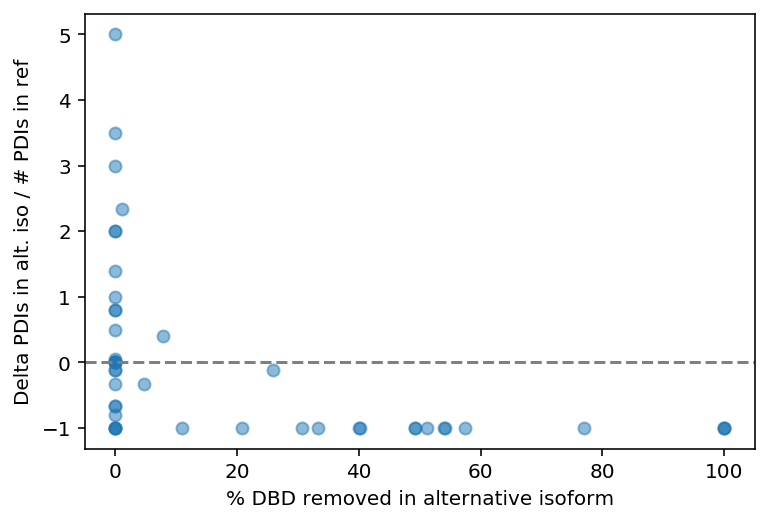

In [82]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df['dbd_pct_lost'].values,
           df['delta_pdi'].values,
           alpha=0.5)
ax.axhline(0, linestyle='--', color='grey')
ax.set_ylabel('Delta PDIs in alt. iso / # PDIs in ref')
ax.set_xlabel('% DBD removed in alternative isoform')
plt.savefig('../../figures/DBD_change_vs_PDI_scatter.pdf', 
            bbox_inches='tight')

In [25]:
df.sort_values('delta_pdi', ascending=False)

,dbd_fraction,gene,delta_pdi,dbd_pct_lost
isoacc,,,,
LHX9|3/3|07A01,1.000000,LHX9,5.000000,0.000000
PKNOX1|3/4|06H03,1.000000,PKNOX1,3.500000,0.000000
PKNOX1|4/4|06G03,1.000000,PKNOX1,3.000000,0.000000
DLX4|2/3|10A03,0.988506,DLX4,2.333333,1.149425
HEY1|2/2|04E03,1.000000,HEY1,2.000000,0.000000
LHX9|2/3|06D10,1.000000,LHX9,2.000000,0.000000
TFAP2A|4/4|11C09,1.000000,TFAP2A,1.400000,0.000000
TGIF1|3/3|02B10,1.000000,TGIF1,1.000000,0.000000
TFAP2A|2/4|09G07,1.000000,TFAP2A,0.800000,0.000000


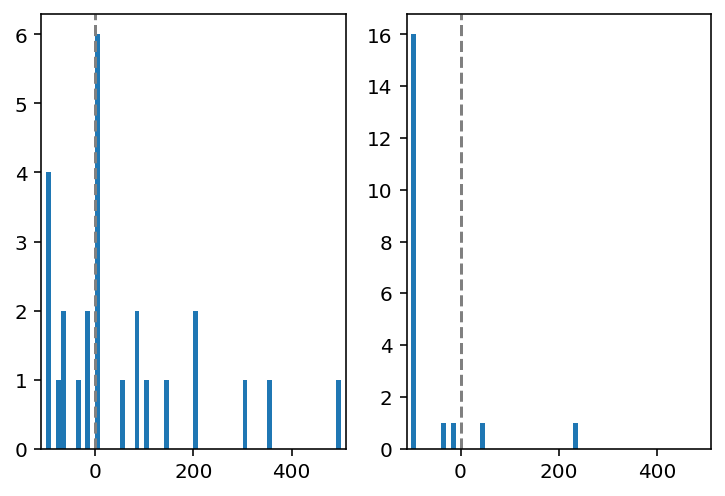

In [35]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(df.loc[df['dbd_pct_lost'] == 0, 'delta_pdi'].values * 100,
             range=(-100, 500), bins=6*10)
axes[1].hist(df.loc[df['dbd_pct_lost'] > 0, 'delta_pdi'].values * 100,
             range=(-100, 500), bins=6*10)
for ax in axes:
    ax.axvline(0, linestyle='--', color='grey')
    ax.set_xlim(-110, 510)

In [36]:
import seaborn as sns

In [72]:
df['dbd_affected'] = df['dbd_pct_lost'] > 0
df['dbd_affected'] = df['dbd_affected'].map({False: 'Full DBD in\nalternative isoform', True: 'Partial or full\nloss of DBD'})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


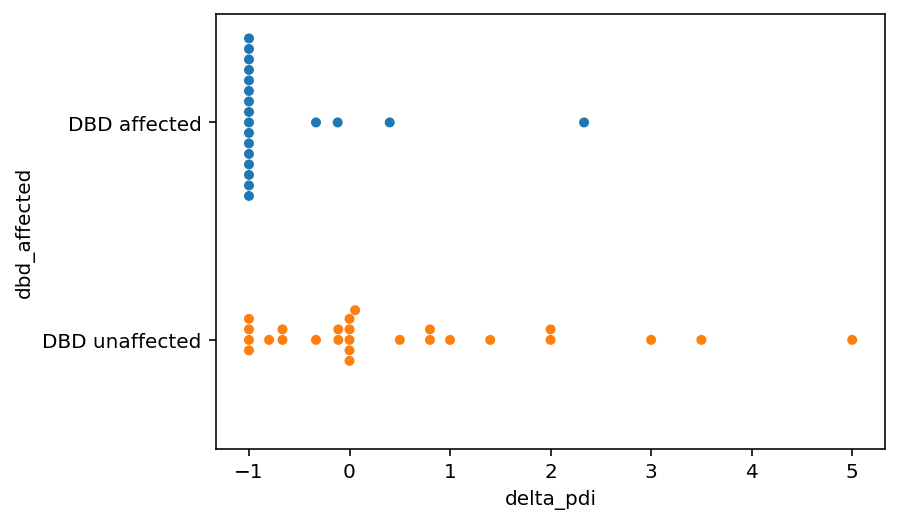

In [40]:

sns.swarmplot(data=df, x='delta_pdi', y='dbd_affected')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


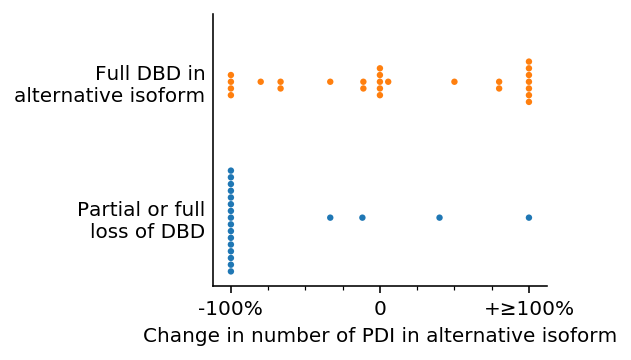

In [101]:
# make a version truncated at 100%

# TODO: labels, bigger points, smaller figure

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(3, 2.5)
df['delta_pdi_trunc'] = df['delta_pdi'].clip(upper=1)
sns.swarmplot(data=df, 
              x='delta_pdi_trunc', 
              y='dbd_affected',
              size=3.2,
              ax=ax,
              alpha=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.yaxis.set_tick_params(length=0)
ax.set_ylabel('')
ax.set_xticks([-1, 0, 1])
ax.set_xticks(np.linspace(-1, 1, 9), minor=True)
ax.set_xticklabels(['-100%', '0', '+≥100%'])
ax.invert_yaxis()
ax.set_xlabel('Change in number of PDI in alternative isoform')
plt.savefig('../../figures/DBD_change_vs_PDI_truncated.pdf', bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


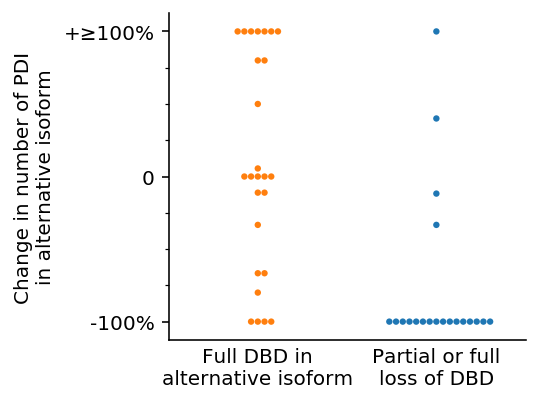

In [110]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(3.2, 3)
df['delta_pdi_trunc'] = df['delta_pdi'].clip(upper=1)
sns.swarmplot(data=df, 
              y='delta_pdi_trunc', 
              x='dbd_affected',
              size=3.2,
              ax=ax,
              alpha=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('')
ax.set_yticks([-1, 0, 1])
ax.set_yticks(np.linspace(-1, 1, 9), minor=True)
ax.set_yticklabels(['-100%', '0', '+≥100%'])
ax.invert_xaxis()
ax.set_ylabel('Change in number of PDI\nin alternative isoform')
plt.savefig('../../figures/DBD_change_vs_PDI_truncated_inverted.pdf', bbox_inches='tight')

In [90]:
help(sns.swarmplot)

Help on function swarmplot in module seaborn.categorical:

swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
    Draw a categorical scatterplot with non-overlapping points.
    
    This function is similar to :func:`stripplot`, but the points are adjusted
    (only along the categorical axis) so that they don't overlap. This gives a
    better representation of the distribution of values, but it does not scale
    well to large numbers of observations. This style of plot is sometimes
    called a "beeswarm".
    
    A swarm plot can be drawn on its own, but it is also a good complement
    to a box or violin plot in cases where you want to show all observations
    along with some representation of the underlying distribution.
    
    Arranging the points properly requires an accurate transformation between
    data and point coordinates. This means 

In [86]:
(df['dbd_pct_lost'] > 0).sum()

20

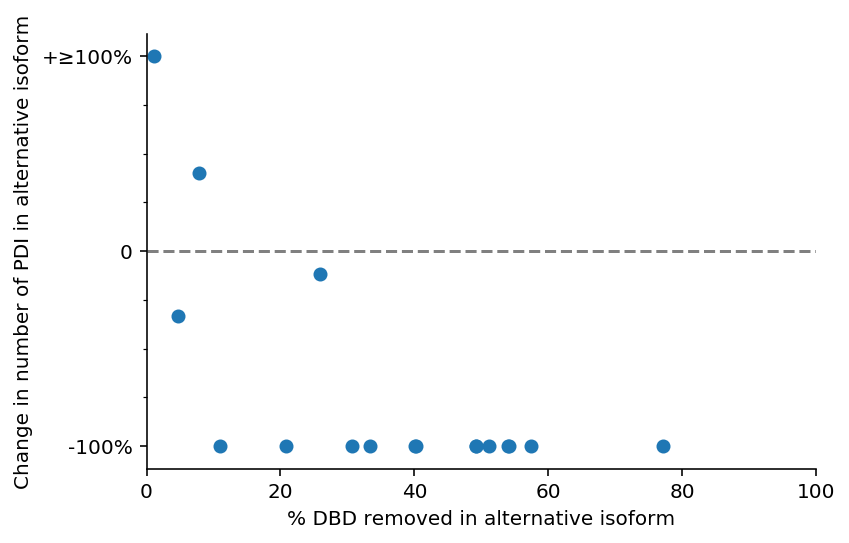

In [106]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df.loc[(df['dbd_pct_lost'] > 0) & (df['dbd_pct_lost'] < 100), 'dbd_pct_lost'].values,
           df.loc[(df['dbd_pct_lost'] > 0) & (df['dbd_pct_lost'] < 100), 'delta_pdi_trunc'].values,
           alpha=1)
ax.axhline(0, linestyle='--', color='grey')

ax.set_xlabel('% DBD removed in alternative isoform')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, 100)
ax.set_yticks([-1, 0, 1])
ax.set_yticks(np.linspace(-1, 1, 9), minor=True)
ax.set_yticklabels(['-100%', '0', '+≥100%'])
ax.set_ylabel('Change in number of PDI in alternative isoform')
plt.savefig('../../figures/DBD_change_vs_PDI_scatter_only_partially_affected.pdf', 
            bbox_inches='tight')

In [85]:
df.head()

,dbd_fraction,gene,delta_pdi,dbd_pct_lost,dbd_affected,delta_pdi_trunc
isoacc,,,,,,
DLX1|2/2|07E09,0.000000,DLX1,-1.000000,100.000000,Partial or full\nloss of DBD,-1.0
DLX4|2/3|10A03,0.988506,DLX4,2.333333,1.149425,Partial or full\nloss of DBD,1.0
DLX4|3/3|10B05,0.666667,DLX4,-1.000000,33.333333,Partial or full\nloss of DBD,-1.0
DLX5|2/2|06H01,0.000000,DLX5,-1.000000,100.000000,Partial or full\nloss of DBD,-1.0
EBF1|2/3|06D12,0.508021,EBF1,-1.000000,49.197861,Partial or full\nloss of DBD,-1.0
